In [218]:
# Time series
# build model
# SHAP analysis - model telling you what factor has highest contr to target variable



In [219]:
import pandas as pd
import seaborn as sns

In [220]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [221]:
df = pd.read_csv('data/FRB_monthly_debt_bals.csv')

In [222]:
df.tail()

,Series Description,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Finance rate on personal loans at commercial banks, 24 month loan; not seasonally adjusted","Commercial bank interest rate on credit card plans, all accounts; not seasonally adjusted","Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted"
972,2023-08,-3.65,15.92,-10.35,4967955.59,1287912.61,3680042.98,4949641.73,3415.36,2064611.04,...,12.17,21.19,22.77,NaN,NaN,NaN,NaN,ND,ND,ND
973,2023-09,2.45,4.02,1.9,4978098.2,1292228.39,3685869.81,4960665.86,3591.38,2064949.43,...,ND,ND,ND,NaN,NaN,NaN,NaN,65.39,6.73,38587.53
974,2023-10,1.72,2.84,1.33,4985242.91,1295284.52,3689958.39,4964114.27,3591.38,2063463.1,...,ND,ND,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN
975,2023-11,5.65,16.61,1.8,5008723.24,1313216.67,3695506.57,5002177.52,3591.38,2098222.35,...,12.35,21.47,22.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
976,2023-12,0.37,0.95,0.17,"5,010,283.93",1314257.94,3696025.99,5010283.93,3591.38,2097653.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
df.columns

Index(['Series Description',
       'Percent change of total consumer credit, seasonally adjusted at an annual rate',
       'Percent change of total revolving consumer credit, seasonally adjusted at an annual rate',
       'Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate',
       'Total consumer credit owned and securitized, seasonally adjusted level',
       'Revolving consumer credit owned and securitized, seasonally adjusted level',
       'Nonrevolving consumer credit owned and securitized, seasonally adjusted level',
       'Total consumer credit owned and securitized, not seasonally adjusted level',
       'Total securitized consumer credit, not seasonally adjusted level',
       'Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level',
       ...
       'Finance rate on personal loans at commercial banks, 24 month loan; not seasonally adjusted',
       'Commercial bank interest rate on cr

In [224]:
df['Total consumer credit owned and securitized, not seasonally adjusted level'] = pd.to_numeric(df['Total consumer credit owned and securitized, not seasonally adjusted level'], errors='coerce')

In [225]:
df['credit_12m_ago'] = df['Total consumer credit owned and securitized, not seasonally adjusted level'].shift(12)
df['credit_yoy'] = (df['Total consumer credit owned and securitized, not seasonally adjusted level'] - df['credit_12m_ago']) / df['credit_12m_ago']

In [226]:
df.tail(15)

,Series Description,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted",credit_12m_ago,credit_yoy
962,2022-10,8.83,14.34,7.06,4842165.47,1185503.87,3656661.6,4821036.84,2518.58,1977623.68,...,ND,NaN,NaN,NaN,NaN,ND,ND,ND,4474332.59,0.077487
963,2022-11,8.15,15.77,5.67,4875038.31,1201084.07,3673954.24,4868492.58,2748.75,2010182.07,...,20.4,NaN,NaN,NaN,NaN,ND,ND,ND,4515454.30,0.078184
964,2022-12,4.68,11.51,2.44,4894041.43,1212609.01,3681432.42,4894041.43,2973.88,2032822.9,...,ND,NaN,NaN,NaN,NaN,67.2,6.07,39407.02,4548536.16,0.075960
965,2023-01,5.42,10.3,3.81,4916136.59,1223019.11,3693117.48,4897785.77,2994.48,2013636.82,...,ND,NaN,NaN,NaN,NaN,ND,ND,ND,4547714.49,0.076977
966,2023-02,2.69,3.3,2.49,4927157.05,1226382.86,3700774.19,4882667.81,3001.59,1999903.08,...,20.92,NaN,NaN,NaN,NaN,ND,ND,ND,4553256.79,0.072346
967,2023-03,4.57,13.42,1.64,4945936.43,1240096.61,3705839.82,4886478.59,3009.13,2002494.19,...,ND,NaN,NaN,NaN,NaN,66.27,6.41,39066.36,4576955.00,0.067627
968,2023-04,3.49,13.06,0.29,4960313.58,1253588.47,3706725.11,4903337.06,3010.03,2019226.57,...,ND,NaN,NaN,NaN,NaN,ND,ND,ND,4607786.69,0.064142
969,2023-05,-0.21,7.58,-2.84,4959445.4,1261508.31,3697937.09,4917233.74,3010.61,2031660.95,...,22.16,NaN,NaN,NaN,NaN,ND,ND,ND,4649301.95,0.057628
970,2023-06,2.94,-0.99,4.29,4971610.2,1260463.51,3711146.69,4940746.08,3020.46,2037004.51,...,ND,NaN,NaN,NaN,NaN,65.37,6.6,38689.2,4694075.74,0.052549
971,2023-07,2.78,10.08,0.3,4983110.63,1271047.38,3712063.25,4945792.07,3213.27,2039933.26,...,ND,NaN,NaN,NaN,NaN,ND,ND,ND,4714302.19,0.049104


In [227]:
 df = df.rename({'Series Description': 'Date'}, axis=1)

In [228]:
df.head()

,Date,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted",credit_12m_ago,credit_yoy
0,Unit:,Percent,Percent,Percent,Currency,Currency,Currency,NaN,Currency,Currency,...,Percent,Percent,Months,Percent,Currency,Months,Percent,Currency,NaN,NaN
1,Multiplier:,1,1,1,1000000,1000000,1000000,1000000.0,1000000,1000000,...,1,1,1,1,1,1,1,1,NaN,NaN
2,Currency:,USD,USD,USD,USD,USD,USD,NaN,USD,USD,...,USD,USD,USD,USD,USD,USD,USD,USD,NaN,NaN
3,Unique Identifier:,G19/CCOUT/DTCTL_@%A_BA.M,G19/CCOUT/DTCTLR_@%A_BA.M,G19/CCOUT/DTCTLN_@%A_BA.M,G19/CCOUT/DTCTL.M,G19/CCOUT/DTCTLR.M,G19/CCOUT/DTCTLN.M,NaN,G19/CCOUT/DTCNL_N.M,G19/CCOUT/DTCTLHD_N.M,...,G19/TERMS/RIFSPBCICCI_N.M,G19/TERMS/H0.RIFLPCFAN_N.M,G19/TERMS/H0.DTCTLVNM_N.M,G19/TERMS/H0.DTCTLVNL_N.M,G19/TERMS/H0.DTCTLVNA_N.M,G19/TERMS/DTCTLVENM_N.M,G19/TERMS/RIELPCFAN_N.M,G19/TERMS/DTCTLVENA_N.M,NaN,NaN
4,Time Period,DTCTL_@%A_BA.M,DTCTLR_@%A_BA.M,DTCTLN_@%A_BA.M,DTCTL.M,DTCTLR.M,DTCTLN.M,NaN,DTCNL_N.M,DTCTLHD_N.M,...,RIFSPBCICCI_N.M,H0.RIFLPCFAN_N.M,H0.DTCTLVNM_N.M,H0.DTCTLVNL_N.M,H0.DTCTLVNA_N.M,DTCTLVENM_N.M,RIELPCFAN_N.M,DTCTLVENA_N.M,NaN,NaN


In [229]:
df=df[5:]
df.head()

,Date,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted",credit_12m_ago,credit_yoy
5,1943-01,NaN,NaN,NaN,6577.83,NaN,6577.83,6550.0,NaN,2554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1943-02,-20.94,NaN,-20.94,6463.04,NaN,6463.04,6276.0,NaN,2444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1943-03,-42.49,NaN,-42.49,6234.21,NaN,6234.21,6099.0,NaN,2376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1943-04,-20.88,NaN,-20.88,6125.75,NaN,6125.75,6065.0,NaN,2324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1943-05,-37.12,NaN,-37.12,5936.26,NaN,5936.26,5967.0,NaN,2278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [230]:
df.shape

(972, 121)

In [231]:
df.head()

,Date,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted",credit_12m_ago,credit_yoy
5,1943-01,NaN,NaN,NaN,6577.83,NaN,6577.83,6550.0,NaN,2554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1943-02,-20.94,NaN,-20.94,6463.04,NaN,6463.04,6276.0,NaN,2444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1943-03,-42.49,NaN,-42.49,6234.21,NaN,6234.21,6099.0,NaN,2376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1943-04,-20.88,NaN,-20.88,6125.75,NaN,6125.75,6065.0,NaN,2324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1943-05,-37.12,NaN,-37.12,5936.26,NaN,5936.26,5967.0,NaN,2278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


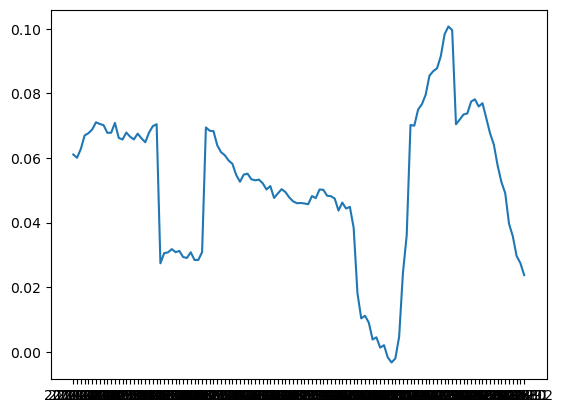

In [232]:
#Lookinga t credit since 2000

import matplotlib.pyplot as plt

mask = df[852:]

plt.plot(mask['Date'], mask['credit_yoy'])


In [233]:
df_bls = pd.read_csv('data/BLS_data.csv')
df_bls.head()

,Unnamed: 0,year,periodName,CPI,CPI_yoy,Unemployment,NF Employment,NF Employment_yoy,ULC,ULC_yoy,...,Food,Food_yoy,Gasoline,Gasoline_yoy,Imports,Imports_yoy,New & Used Vehicles,New & Used Vehicles_yoy,All Items Less Food & Shelter,All Items Less Food & Shelter_yoy
0,0,2023,December,306.746,3.352123,3.7,157347.0,1.980673,NaN,NaN,...,325.409,2.704844,3.289,-1.996424,139.5,-1.622003,127.596,0.080004,270.725,2.184670
1,1,2023,November,307.051,3.137271,3.7,157014.0,1.854627,NaN,NaN,...,325.172,2.949119,3.500,-9.161692,139.5,-1.483051,127.908,-0.096070,270.202,2.107125
2,2,2023,October,307.671,3.241145,3.8,156832.0,1.907120,NaN,NaN,...,325.731,3.300742,3.782,-5.826693,140.2,-1.751927,126.772,-1.819984,269.779,2.020913
3,3,2023,September,307.789,3.699698,3.8,156667.0,2.039261,NaN,NaN,...,324.704,3.692255,3.988,2.757021,141.0,-1.467505,127.343,-1.915582,269.390,1.930855
4,4,2023,August,307.026,3.665112,3.8,156421.0,2.048525,NaN,NaN,...,324.100,4.254121,3.955,-3.560107,140.3,-2.973721,128.323,-0.803172,269.199,2.318519


In [234]:
#Loading Aaran's full dataset to combine with credit yoy from df
#df_first = pd.read_csv('data/all_monthly_data_clean.csv')
#df_first.head()

In [235]:
#df_first['date'] = pd.to_datetime(df_first['month']+' '+df_first['year'].astype(str))

#df_first.set_index('date', inplace=True)
#df_first.sort_index(inplace=True)




In [236]:
#df_first.head()

In [237]:
#df.head()

In [238]:
#df.reset_index(inplace=True, drop = True)
#df.head()

In [239]:
#df = df[684:]
#df.head()

In [240]:
#df.reset_index(inplace=True)
#df.head()

In [241]:
#df = df.drop(columns = 'index')
#df.head()

In [242]:
#df['Date'] = pd.to_datetime(df['Date'])
#df.set_index(df['Date'], inplace=True)
#df.head()

In [243]:
#df = df.drop(columns = 'Date')
#df.head()

In [244]:
#df_first.head()

In [245]:
#plt.figure(figsize=(10, 6)) 
#plt.title('Credit Year-Over-Year')
#plt.xlabel('Year')
#plt.ylabel('Credit YoY Change')
#plt.plot(df['credit_yoy'])


#plt.show()


In [246]:
#df_first.head()

In [247]:
#Combining credit with original Aaran's df
#df_first['credit_yoy'] = df['credit_yoy']


In [248]:
#df_first.info()

In [249]:
#removing 2001
#df_first_cut = df_first[12:]

In [250]:
#plt.plot(df_first_cut['shelter_yoy'])
#plt.plot(df_first_cut['credit_yoy'])
#plt.show()


In [251]:
#df_first_cut.head()

In [252]:
#multiplyhing credit by 100
#df_first_cut['credit_yoy'] = 100* df_first_cut['credit_yoy']

In [253]:
#df_first_cut.head()

In [254]:
#df_first_cut.to_csv('data/Master_data.csv')

In [255]:
df_first_cut = pd.read_csv('data/Master_data.csv')

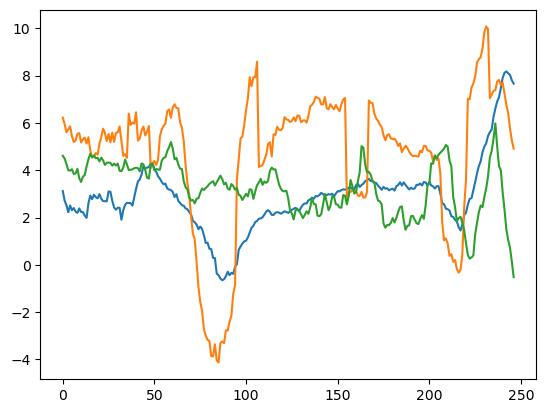

In [256]:
plt.plot(df_first_cut['shelter_yoy'])
plt.plot(df_first_cut['credit_yoy'])
plt.plot(df_first_cut['medical_care_yoy'])
plt.show()

In [257]:
df_first_cut.corr()['credit_yoy'].sort_values(ascending=False)

credit_yoy                                                       1.000000
shelter_yoy                                                      0.587798
cpi_yoy                                                          0.515323
Mortgage_servicing_yoy                                           0.458956
food_yoy                                                         0.374590
                                                                   ...   
total_personal_savings                                          -0.236600
personal_saving_as_a_percentage_of_disposable_personal_income   -0.318464
HE Revolving                                                    -0.360207
unemployment_insurance                                          -0.379517
unemployment_rate                                               -0.576700
Name: credit_yoy, Length: 66, dtype: float64

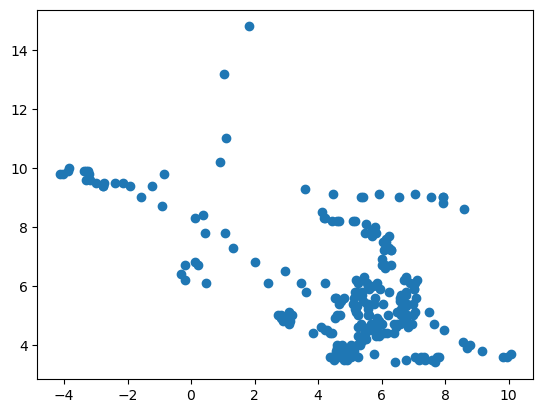

In [258]:
plt.scatter(df_first_cut['credit_yoy'], df_first_cut['unemployment_rate'])

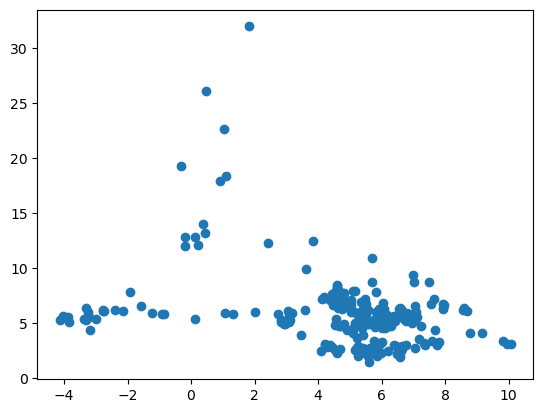

In [259]:
plt.scatter(df_first_cut['credit_yoy'], df_first_cut['personal_saving_as_a_percentage_of_disposable_personal_income'])

<AxesSubplot:xlabel='credit_yoy', ylabel='Count'>

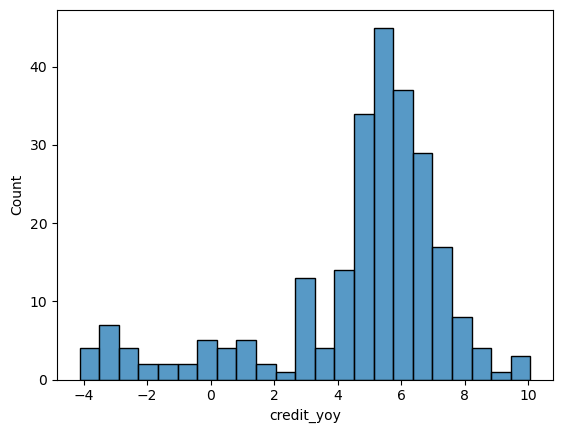

In [260]:
sns.histplot(df_first_cut['credit_yoy'])

<AxesSubplot:xlabel='personal_saving_as_a_percentage_of_disposable_personal_income', ylabel='Count'>

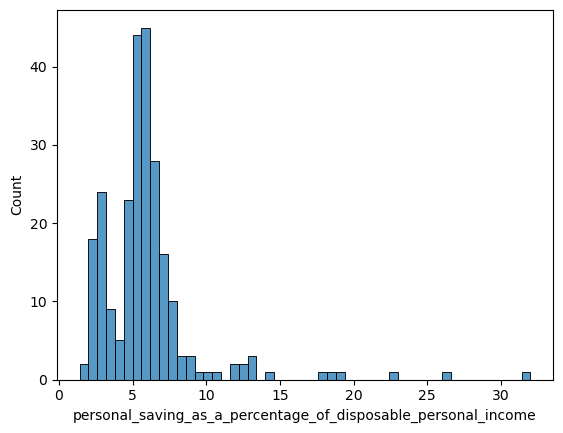

In [261]:
sns.histplot(df_first_cut['personal_saving_as_a_percentage_of_disposable_personal_income'])

In [262]:
df_first_cut.columns

Index(['Unnamed: 0', 'date', 'year', 'month', 'population',
       'unemployment_rate', 'hourly_earnings_yoy', 'cpi_yoy', 'shelter_yoy',
       'energy_yoy', 'medical_care_yoy', 'food_yoy', 'gasoline_yoy',
       'imports_yoy', 'new_&_used_vehicles_yoy', 'all_less_food_&_shelter_yoy',
       'total_personal_income', 'total_employee_compensation',
       'wages_and_salaries_all', 'wages_salaries_private_employees',
       'wages_salaries_government_employees',
       'employer_contributions_for_employee_pension_and_insurance_funds',
       'employer_contributions_for_government_social_insurance',
       'rental_income_(capital_consumption_adjusted)',
       'personal_dividend_income', 'personal_interest_income',
       'total_gov_social_benefits', 'social_security', 'medicare', 'medicaid',
       'unemployment_insurance', 'veterans'_benefits',
       'total_disposible_personal_income_chained_2017',
       'total_personal_savings',
       'personal_saving_as_a_percentage_of_disposable_pe

In [263]:
features = ['cpi_yoy', 'shelter_yoy', 'energy_yoy',
       'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'total_personal_income', 'total_employee_compensation',
       'wages_and_salaries_all', 'wages_salaries_private_employees',
       'wages_salaries_government_employees', 'rental_income_(capital_consumption_adjusted)', 'credit_yoy', 'unemployment_rate']
    

In [264]:
df1 = df_first_cut[features]

/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/steve

/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/steve

/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/steve

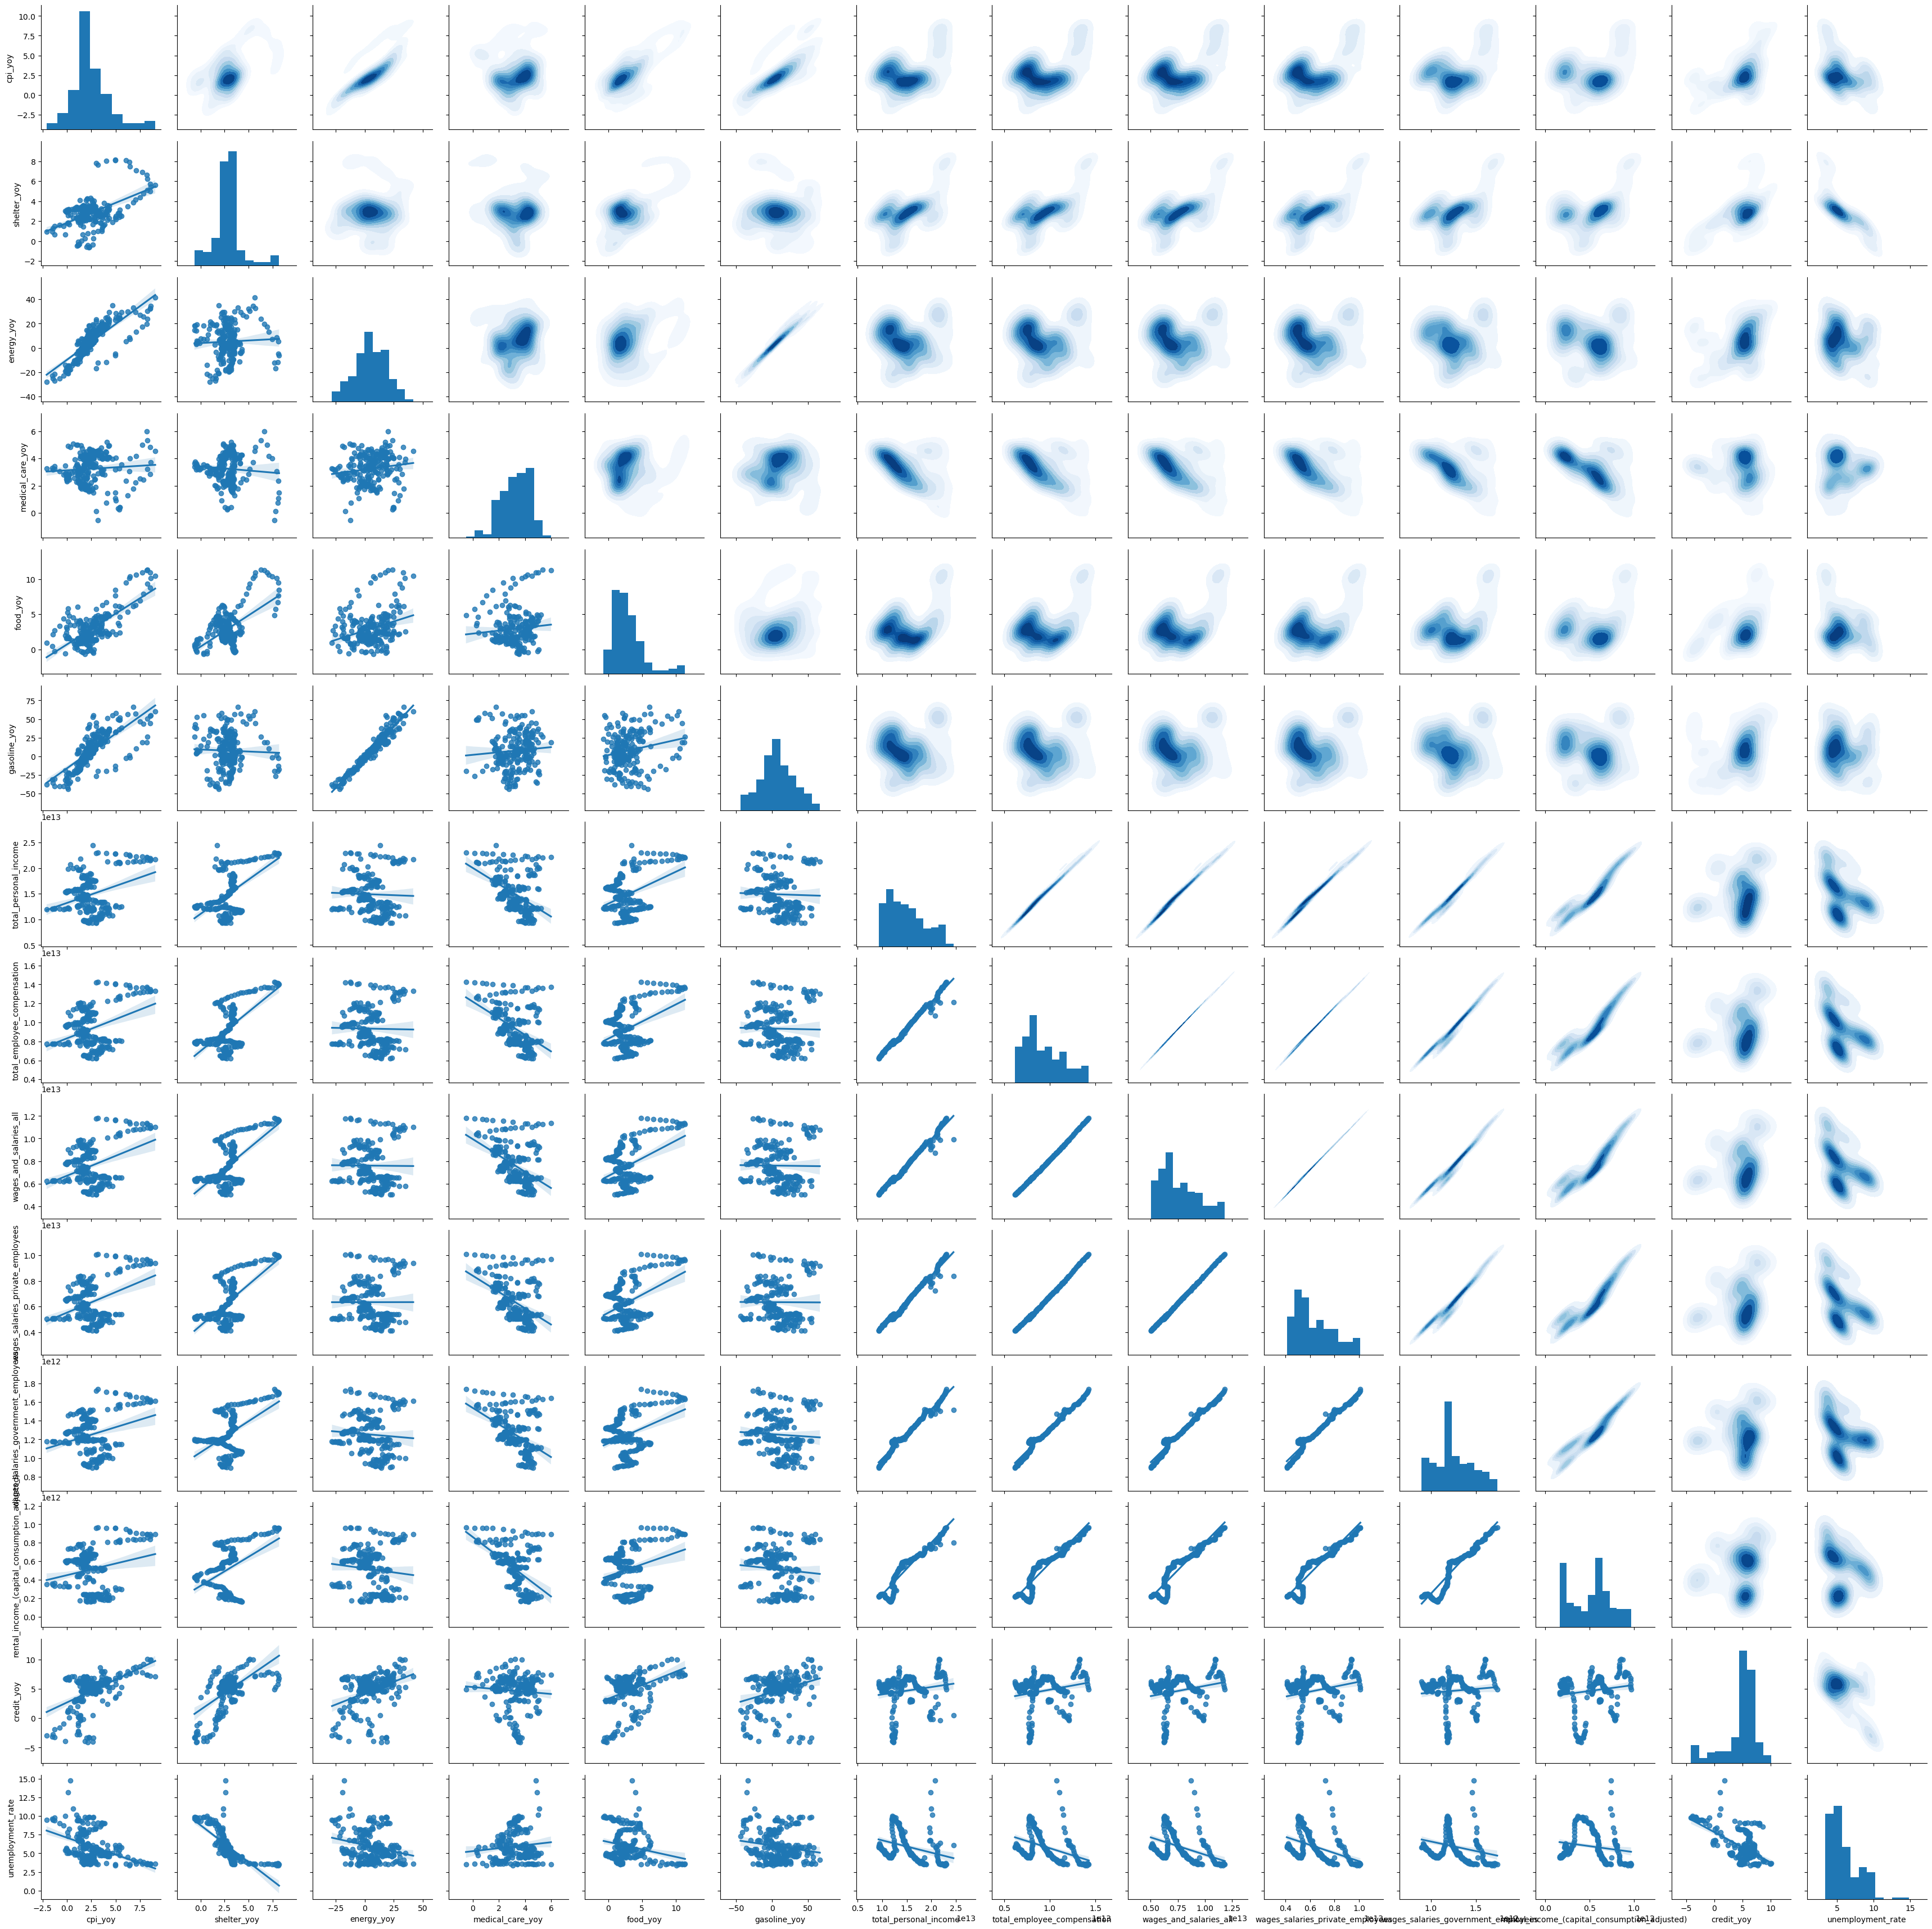

In [265]:
g = sns.PairGrid(df1)
g = g.map_lower(sns.regplot)
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)
g = g.map_diag(plt.hist)

plt.show()

<AxesSubplot:>

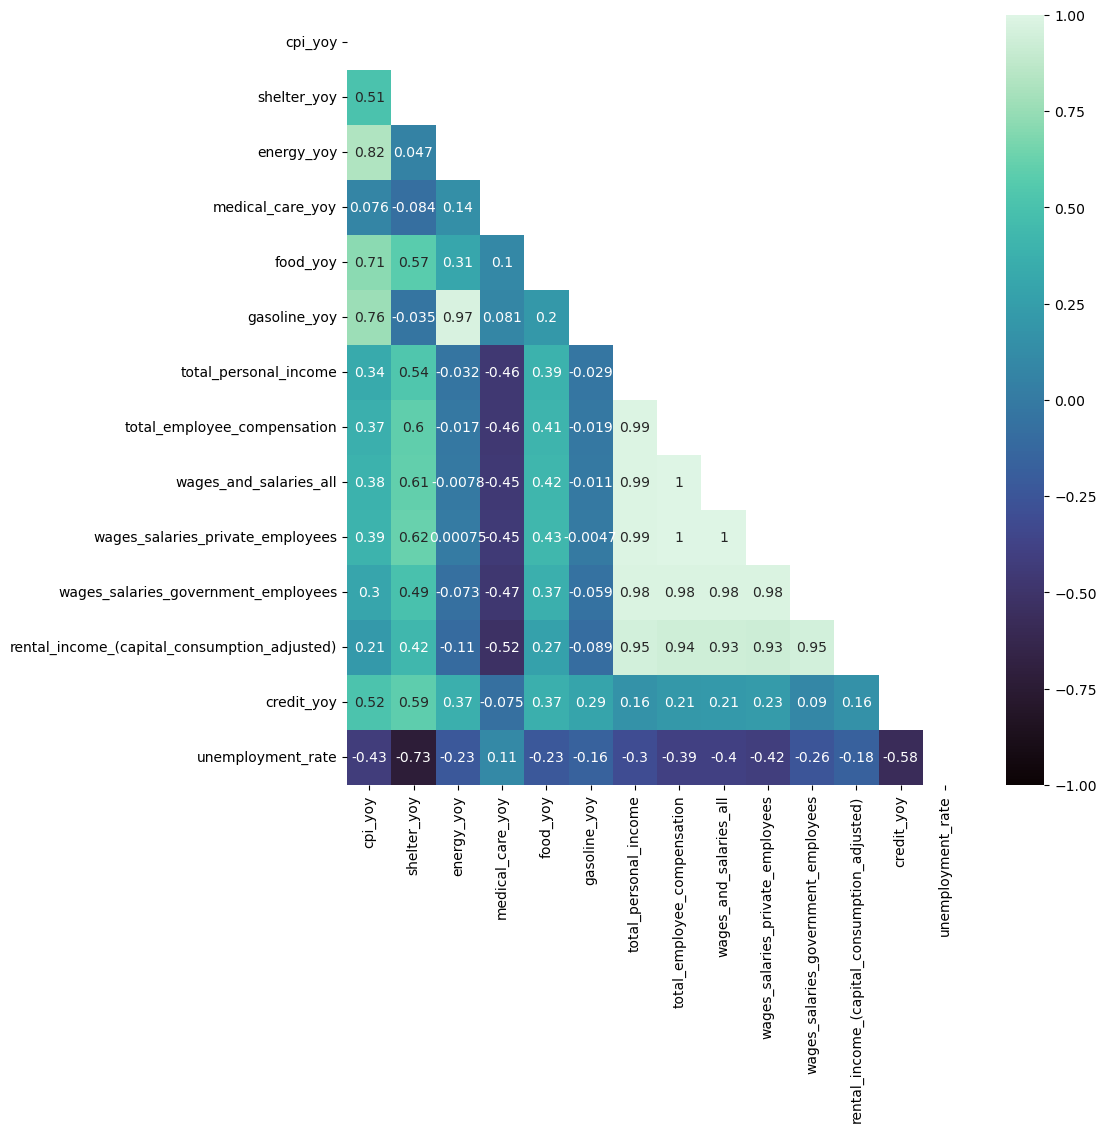

In [266]:
import numpy as np

plt.figure(figsize=(10,10))

corr = df1.corr()

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask = mask, annot = True, fmt='.2g', cmap = 'mako', vmax =1, vmin = -1 )

In [267]:
df_first_cut.head()

,Unnamed: 0,date,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,...,cc_bals_90d_due_percentage,Mortgage_servicing,cc_payments,cc_payments_yoy,Mortgage_servicing_yoy,cc_bals_30d_due_percentage_yoy,cc_bals_90d_due_percentage_yoy,cc_bals_30d_due_percentage_yoy_3m,cc_bals_30d_due_percentage_yoy_6m,cc_bals_30d_due_percentage_6m
0,0,2003-01-01,2003,January,289412000.0,5.8,NaN,2.597403,3.120429,14.145031,...,NaN,29.236872,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1,2003-02-01,2003,February,289606000.0,5.9,NaN,2.980877,2.718447,21.981982,...,NaN,29.679900,8.49618,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2,2003-03-01,2003,March,289809000.0,5.9,NaN,3.020134,2.520601,23.356401,...,NaN,29.184600,8.46384,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,3,2003-04-01,2003,April,290024000.0,6.0,NaN,2.224694,2.222222,13.011457,...,NaN,29.527500,8.43150,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,4,2003-05-01,2003,May,290250000.0,6.1,NaN,2.057842,2.507232,9.031733,...,NaN,28.423572,8.39916,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [268]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [269]:
df_first_cut.columns

Index(['Unnamed: 0', 'date', 'year', 'month', 'population',
       'unemployment_rate', 'hourly_earnings_yoy', 'cpi_yoy', 'shelter_yoy',
       'energy_yoy', 'medical_care_yoy', 'food_yoy', 'gasoline_yoy',
       'imports_yoy', 'new_&_used_vehicles_yoy', 'all_less_food_&_shelter_yoy',
       'total_personal_income', 'total_employee_compensation',
       'wages_and_salaries_all', 'wages_salaries_private_employees',
       'wages_salaries_government_employees',
       'employer_contributions_for_employee_pension_and_insurance_funds',
       'employer_contributions_for_government_social_insurance',
       'rental_income_(capital_consumption_adjusted)',
       'personal_dividend_income', 'personal_interest_income',
       'total_gov_social_benefits', 'social_security', 'medicare', 'medicaid',
       'unemployment_insurance', 'veterans'_benefits',
       'total_disposible_personal_income_chained_2017',
       'total_personal_savings',
       'personal_saving_as_a_percentage_of_disposable_pe

In [270]:
features = ['cpi_yoy', 'shelter_yoy', 'energy_yoy',
       'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'new_&_used_vehicles_yoy', 'total_personal_savings', 'total_employee_compensation',
           'population', 'wages_and_salaries_all', 'employer_contributions_for_government_social_insurance' , 'social_security', 'personal_interest_income', 'mortgage_rate_30_yr',
       'tax_other_to_government']
X = df_first_cut[features]
y = df_first_cut['credit_yoy']


In [271]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   cpi_yoy                                                 247 non-null    float64
 1   shelter_yoy                                             247 non-null    float64
 2   energy_yoy                                              247 non-null    float64
 3   medical_care_yoy                                        247 non-null    float64
 4   food_yoy                                                247 non-null    float64
 5   gasoline_yoy                                            247 non-null    float64
 6   new_&_used_vehicles_yoy                                 247 non-null    float64
 7   total_personal_savings                                  247 non-null    float64
 8   total_employee_compensation             

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [273]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [274]:
pipe1= Pipeline([
    ('lasso', Lasso())
])

pipe1_params = {
               'lasso__alpha': [0.01, 0.1, 1, 10, 100]
                }

gs_lr = GridSearchCV(pipe1,
                  param_grid=pipe1_params,
                  cv=5,
                  verbose=1)

gs_lr.fit(X_train, y_train)

gs_lr_model = gs_lr.best_estimator_

cross_val_score(gs_lr_model, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.704e-01, tolerance: 1.361e-01
  model = cd_fast.enet_coordinate_descent(
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.911e-01, tolerance: 1.229e-01
  model = cd_fast.enet_coordinate_descent(
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

0.783200680178912

In [275]:
pipe2= Pipeline([
    ('ridge', Ridge())
])

pipe2_params = {
               'ridge__alpha': [0.01, 0.1, 1, 10, 100]
                }

gs_lr2 = GridSearchCV(pipe2,
                  param_grid=pipe2_params,
                  cv=5,
                  verbose=1)

gs_lr2.fit(X_train, y_train)

gs_lr2_model = gs_lr2.best_estimator_

cross_val_score(gs_lr2_model, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


0.8022984951053556

In [276]:
gs_lr2_model.score(X_train, y_train)

0.8484416581556473

In [277]:
#Build mortgage costs
# add homelessness, foreclosure data?
#Look for polynomial, log data



In [278]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.893798015669065

In [279]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.8318064079560307

In [280]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns)

In [281]:
feature_imp.sort_values(ascending=False)

shelter_yoy                                               0.546769
cpi_yoy                                                   0.092076
total_personal_savings                                    0.078303
gasoline_yoy                                              0.040827
energy_yoy                                                0.037651
new_&_used_vehicles_yoy                                   0.031303
food_yoy                                                  0.027104
personal_interest_income                                  0.026220
mortgage_rate_30_yr                                       0.021618
social_security                                           0.019560
wages_and_salaries_all                                    0.018635
medical_care_yoy                                          0.015141
total_employee_compensation                               0.014569
employer_contributions_for_government_social_insurance    0.011894
population                                                0.00

In [282]:
df_first_cut.columns

Index(['Unnamed: 0', 'date', 'year', 'month', 'population',
       'unemployment_rate', 'hourly_earnings_yoy', 'cpi_yoy', 'shelter_yoy',
       'energy_yoy', 'medical_care_yoy', 'food_yoy', 'gasoline_yoy',
       'imports_yoy', 'new_&_used_vehicles_yoy', 'all_less_food_&_shelter_yoy',
       'total_personal_income', 'total_employee_compensation',
       'wages_and_salaries_all', 'wages_salaries_private_employees',
       'wages_salaries_government_employees',
       'employer_contributions_for_employee_pension_and_insurance_funds',
       'employer_contributions_for_government_social_insurance',
       'rental_income_(capital_consumption_adjusted)',
       'personal_dividend_income', 'personal_interest_income',
       'total_gov_social_benefits', 'social_security', 'medicare', 'medicaid',
       'unemployment_insurance', 'veterans'_benefits',
       'total_disposible_personal_income_chained_2017',
       'total_personal_savings',
       'personal_saving_as_a_percentage_of_disposable_pe

In [283]:
#Working with debt bals
debt_bals = pd.read_csv('data/NYFED_Debt_Bals.csv')

In [284]:
debt_bals.head()


,Qtr,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,03:Q1,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03:Q3,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,03:Q4,5.660,0.302,0.704,0.698,0.2529,0.4486,8.0655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,04:Q1,5.840,0.328,0.720,0.695,0.2598,0.4465,8.2893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [285]:
def convert_to_datetime(qtr_date):
    qtr_date_str = str(qtr_date)
    yr, qtr = qtr_date.split(':')
    year = '20' + yr
    quarter_to_month = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}
    month = quarter_to_month[qtr]
    return pd.to_datetime(f'{year}-{month}-01').date()

In [286]:
debt_bals = debt_bals[:83]
features = ['Qtr', 'Mortgage', 'HE Revolving', 'Auto Loan', 'Credit Card',
       'Student Loan', 'Other', 'Total']
debt_bals = debt_bals[features]

In [287]:
debt_bals

,Qtr,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total
0,03:Q1,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313
1,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
2,03:Q3,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551
3,03:Q4,5.660,0.302,0.704,0.698,0.2529,0.4486,8.0655
4,04:Q1,5.840,0.328,0.720,0.695,0.2598,0.4465,8.2893
...,...,...,...,...,...,...,...,...
78,22:Q3,11.669,0.322,1.524,0.925,1.5740,0.4910,16.5050
79,22:Q4,11.923,0.336,1.552,0.986,1.5950,0.5070,16.8990
80,23:Q1,12.044,0.339,1.562,0.986,1.6040,0.5120,17.0470
81,23:Q2,12.014,0.340,1.582,1.031,1.5690,0.5270,17.0630


In [288]:
convert_to_datetime('23:Q2')

datetime.date(2023, 4, 1)

In [289]:
debt_bals['date'] = debt_bals['Qtr'].apply(convert_to_datetime)

In [290]:
debt_bals.head()

,Qtr,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total,date
0,03:Q1,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313,2003-01-01
1,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,2003-04-01
2,03:Q3,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551,2003-07-01
3,03:Q4,5.660,0.302,0.704,0.698,0.2529,0.4486,8.0655,2003-10-01
4,04:Q1,5.840,0.328,0.720,0.695,0.2598,0.4465,8.2893,2004-01-01


In [291]:
debt_bals_1 = debt_bals.copy()

In [292]:
debt_bals_1['date'] = pd.to_datetime(debt_bals_1['date']).dt.to_period('M')

In [293]:
debt_bals_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   Qtr           83 non-null     object   
 1   Mortgage      83 non-null     float64  
 2   HE Revolving  83 non-null     float64  
 3   Auto Loan     83 non-null     float64  
 4   Credit Card   83 non-null     float64  
 5   Student Loan  83 non-null     float64  
 6   Other         83 non-null     float64  
 7   Total         83 non-null     float64  
 8   date          83 non-null     period[M]
dtypes: float64(7), object(1), period[M](1)
memory usage: 6.0+ KB


In [294]:
debt_bals_1.set_index('date', inplace=True)

In [295]:
debt_bals_1 = debt_bals_1.resample('M').bfill().reset_index()

In [296]:
debt_bals_1.head()

,date,Qtr,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total
0,2003-01,03:Q1,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313
1,2003-02,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
2,2003-03,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
3,2003-04,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
4,2003-05,03:Q3,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551


In [297]:
df_first_cut.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 69 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Unnamed: 0                                                       247 non-null    int64  
 1   date                                                             247 non-null    object 
 2   year                                                             247 non-null    int64  
 3   month                                                            247 non-null    object 
 4   population                                                       247 non-null    float64
 5   unemployment_rate                                                247 non-null    float64
 6   hourly_earnings_yoy                                              197 non-null    float64
 7   cpi_yoy                                     

In [298]:
df_first_cut_1 = df_first_cut.copy()

In [299]:
df_first_cut_1['date'] = pd.to_datetime(df_first_cut_1['date']).dt.to_period('M')

In [300]:
df_first_cut_1

,Unnamed: 0,date,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,...,cc_bals_90d_due_percentage,Mortgage_servicing,cc_payments,cc_payments_yoy,Mortgage_servicing_yoy,cc_bals_30d_due_percentage_yoy,cc_bals_90d_due_percentage_yoy,cc_bals_30d_due_percentage_yoy_3m,cc_bals_30d_due_percentage_yoy_6m,cc_bals_30d_due_percentage_6m
0,0,2003-01,2003,January,289412000.0,5.8,NaN,2.597403,3.120429,14.145031,...,NaN,29.236872,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN
1,1,2003-02,2003,February,289606000.0,5.9,NaN,2.980877,2.718447,21.981982,...,NaN,29.679900,8.49618,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN
2,2,2003-03,2003,March,289809000.0,5.9,NaN,3.020134,2.520601,23.356401,...,NaN,29.184600,8.46384,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN
3,3,2003-04,2003,April,290024000.0,6.0,NaN,2.224694,2.222222,13.011457,...,NaN,29.527500,8.43150,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN
4,4,2003-05,2003,May,290250000.0,6.1,NaN,2.057842,2.507232,9.031733,...,NaN,28.423572,8.39916,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,242,2023-03,2023,March,334664000.0,3.5,4.616834,4.984974,8.175182,-6.424898,...,1.330000,78.619616,20.97054,60.285403,65.492112,51.559633,26.605505,50.328947,NaN,NaN
243,243,2023-04,2023,April,334792000.0,3.4,4.663537,4.930320,8.095818,-5.064848,...,1.320000,76.198795,21.22829,60.191989,34.304782,53.333333,27.222222,49.065421,NaN,NaN
244,244,2023-05,2023,May,334929000.0,3.7,4.551122,4.047609,8.026785,-11.663368,...,1.386667,77.999500,22.48636,60.671371,27.807544,51.742160,26.829268,NaN,NaN,NaN
245,245,2023-06,2023,June,335080000.0,3.6,4.658385,2.969178,7.798839,-16.738092,...,1.453333,81.507960,22.48636,56.734870,26.494016,50.328947,26.480263,NaN,NaN,NaN


In [301]:
merged_df = pd.merge(df_first_cut_1, debt_bals_1, on='date')

In [302]:
merged_df

,Unnamed: 0,date,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,...,cc_bals_30d_due_percentage_yoy_6m,cc_bals_30d_due_percentage_6m,Qtr_y,Mortgage_y,HE Revolving_y,Auto Loan_y,Credit Card_y,Student Loan_y,Other_y,Total_y
0,0,2003-01,2003,January,289412000.0,5.8,NaN,2.597403,3.120429,14.145031,...,0.0,NaN,03:Q1,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313
1,1,2003-02,2003,February,289606000.0,5.9,NaN,2.980877,2.718447,21.981982,...,0.0,NaN,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
2,2,2003-03,2003,March,289809000.0,5.9,NaN,3.020134,2.520601,23.356401,...,0.0,NaN,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
3,3,2003-04,2003,April,290024000.0,6.0,NaN,2.224694,2.222222,13.011457,...,0.0,NaN,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
4,4,2003-05,2003,May,290250000.0,6.1,NaN,2.057842,2.507232,9.031733,...,0.0,NaN,03:Q3,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,242,2023-03,2023,March,334664000.0,3.5,4.616834,4.984974,8.175182,-6.424898,...,NaN,NaN,23:Q2,12.014,0.340,1.582,1.031,1.5690,0.5270,17.0630
243,243,2023-04,2023,April,334792000.0,3.4,4.663537,4.930320,8.095818,-5.064848,...,NaN,NaN,23:Q2,12.014,0.340,1.582,1.031,1.5690,0.5270,17.0630
244,244,2023-05,2023,May,334929000.0,3.7,4.551122,4.047609,8.026785,-11.663368,...,NaN,NaN,23:Q3,12.140,0.349,1.595,1.079,1.5990,0.5290,17.2910
245,245,2023-06,2023,June,335080000.0,3.6,4.658385,2.969178,7.798839,-16.738092,...,NaN,NaN,23:Q3,12.140,0.349,1.595,1.079,1.5990,0.5290,17.2910


In [303]:
#merged_df.to_csv('df_with_debt.csv')

In [304]:
merged_df.

SyntaxError: invalid syntax (2546113525.py, line 1)

In [ ]:
merged_df['cc_balance_total_billions'] = merged_df['cc_balance_total_billions'].interpolate(method='linear')
merged_df['cc_bals_30d_due_percentage'] = merged_df['cc_bals_30d_due_percentage'].interpolate(method='linear')
merged_df['cc_bals_90d_due_percentage'] = merged_df['cc_bals_90d_due_percentage'].interpolate(method='linear')

merged_df.info()

In [ ]:
#Building some new mortgage features

merged_df['Mortgage_servicing'] = merged_df['mortgage_rate_30_yr'] * merged_df['Mortgage']

In [ ]:
merged_df.set_index('date')

In [ ]:
#Need to convert to datetime to chart with it
merged_df['date'] = merged_df['date'].dt.to_timestamp()

In [ ]:
plt.plot(merged_df['date'],merged_df['Mortgage_servicing'])

In [ ]:
#Now dealing with the c card data

In [ ]:
merged_df['cc_rate_all_ns']

In [ ]:
#coerce makes all errors NaN
merged_df['cc_rate_all_ns'] = pd.to_numeric(merged_df['cc_rate_all_ns'], errors='coerce')
merged_df['cc_rate_all_ns']

In [ ]:
merged_df['cc_rate_all_ns'] = merged_df['cc_rate_all_ns'].interpolate(method='linear')
merged_df['cc_rate_all_ns']

In [ ]:
merged_df['cc_payments'] = merged_df['Credit Card'] * merged_df['cc_rate_all_ns']
merged_df['cc_payments']

In [ ]:
plt.plot(merged_df['date'],merged_df['cc_payments']) #blue
plt.plot(merged_df['date'],merged_df['cc_rate_all_ns']) #orange
plt.legend()

In [ ]:
merged_df['cc_payments_yoy'] = 100*(merged_df['cc_payments'] - merged_df['cc_payments'].shift(12)) / merged_df['cc_payments'].shift(12)

In [ ]:
merged_df['cc_payments_yoy'] = merged_df['cc_payments_yoy'].fillna(0)

In [ ]:
merged_df['cc_payments_yoy']

In [ ]:
merged_df['Mortgage_servicing_yoy'] = 100*(merged_df['Mortgage_servicing'] - merged_df['Mortgage_servicing'].shift(12)) / merged_df['Mortgage_servicing'].shift(12)

In [ ]:
merged_df['Mortgage_servicing_yoy'] = merged_df['Mortgage_servicing_yoy'].fillna(0)

In [ ]:
merged_df['Mortgage_servicing_yoy']

In [ ]:
#Adding mortgage costs and credit card service costs

features = ['cpi_yoy', 'shelter_yoy', 'energy_yoy',
       'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'new_&_used_vehicles_yoy', 'total_personal_savings', 'total_employee_compensation',
           'population', 'wages_and_salaries_all', 'employer_contributions_for_government_social_insurance' , 'social_security', 'personal_interest_income', 'mortgage_rate_30_yr',
       'tax_other_to_government', 'Mortgage_servicing_yoy', 'cc_payments_yoy']
X = merged_df[features]
y = merged_df['credit_yoy']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
pipe1= Pipeline([
    ('lasso', Lasso())
])

pipe1_params = {
               'lasso__alpha': [0.01, 0.1, 1, 10, 100]
                }

gs_lr = GridSearchCV(pipe1,
                  param_grid=pipe1_params,
                  cv=5,
                  verbose=1)

gs_lr.fit(X_train, y_train)

gs_lr_model = gs_lr.best_estimator_

cross_val_score(gs_lr_model, X_train, y_train, cv=5).mean()

In [305]:
pipe2= Pipeline([
    ('ridge', Ridge())
])

pipe2_params = {
               'ridge__alpha': [0.01, 0.1, 1, 10, 100]
                }

gs_lr2 = GridSearchCV(pipe2,
                  param_grid=pipe2_params,
                  cv=5,
                  verbose=1)

gs_lr2.fit(X_train, y_train)

gs_lr2_model = gs_lr2.best_estimator_

cross_val_score(gs_lr2_model, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


0.8022984951053556

In [306]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8853305312731002

In [307]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.825394191404266

In [308]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns)

In [309]:
feature_imp.sort_values(ascending=False)

shelter_yoy                                               0.532387
cpi_yoy                                                   0.104034
total_personal_savings                                    0.077435
energy_yoy                                                0.043340
gasoline_yoy                                              0.038552
new_&_used_vehicles_yoy                                   0.032562
personal_interest_income                                  0.026972
mortgage_rate_30_yr                                       0.025377
food_yoy                                                  0.023364
social_security                                           0.021571
medical_care_yoy                                          0.015550
wages_and_salaries_all                                    0.015267
population                                                0.012843
employer_contributions_for_government_social_insurance    0.010985
total_employee_compensation                               0.01

<AxesSubplot:>

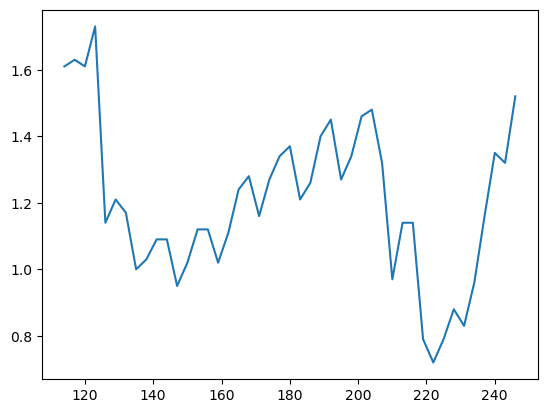

In [310]:
merged_df['cc_bals_90d_due_percentage'].plot()

In [311]:
merged_df['cc_bals_30d_due_percentage_yoy'] = 100*(merged_df['cc_bals_30d_due_percentage'] - merged_df['cc_bals_30d_due_percentage'].shift(12)) / merged_df['cc_bals_30d_due_percentage'].shift(12)
merged_df['cc_bals_30d_due_percentage_yoy'] = merged_df['cc_bals_30d_due_percentage_yoy'].fillna(0)
merged_df['cc_bals_30d_due_percentage_yoy']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
         ...    
242    51.559633
243    53.333333
244    51.742160
245    50.328947
246    49.065421
Name: cc_bals_30d_due_percentage_yoy, Length: 247, dtype: float64

In [312]:
merged_df['cc_bals_90d_due_percentage_yoy'] = 100*(merged_df['cc_bals_90d_due_percentage'] - merged_df['cc_bals_90d_due_percentage'].shift(12)) / merged_df['cc_bals_30d_due_percentage'].shift(12)
merged_df['cc_bals_90d_due_percentage_yoy'] = merged_df['cc_bals_90d_due_percentage_yoy'].fillna(0)
merged_df['cc_bals_90d_due_percentage_yoy']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
         ...    
242    26.605505
243    27.222222
244    26.829268
245    26.480263
246    26.168224
Name: cc_bals_90d_due_percentage_yoy, Length: 247, dtype: float64

In [313]:
#Now trying to predict 30d delinquent

#Adding mortgage costs and credit card service costs

features = ['cpi_yoy', 'shelter_yoy', 'energy_yoy',
       'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'new_&_used_vehicles_yoy', 'total_personal_savings', 'total_employee_compensation',
           'population', 'wages_and_salaries_all', 'employer_contributions_for_government_social_insurance' , 'social_security', 'personal_interest_income', 'mortgage_rate_30_yr',
       'tax_other_to_government', 'Mortgage_servicing_yoy', 'cc_payments_yoy']
X = merged_df[features]
y = merged_df['cc_bals_30d_due_percentage_yoy']

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [315]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [316]:
pipe1= Pipeline([
    ('lasso', Lasso())
])

pipe1_params = {
               'lasso__alpha': [0.01, 0.1, 1, 10, 100]
                }

gs_lr = GridSearchCV(pipe1,
                  param_grid=pipe1_params,
                  cv=5,
                  verbose=1)

gs_lr.fit(X_train, y_train)

gs_lr_model = gs_lr.best_estimator_

cross_val_score(gs_lr_model, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.092e+02, tolerance: 2.677e+00
  model = cd_fast.enet_coordinate_descent(
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.016e+03, tolerance: 2.520e+00
  model = cd_fast.enet_coordinate_descent(
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

0.7071221015161351

In [317]:
pipe2= Pipeline([
    ('ridge', Ridge())
])

pipe2_params = {
               'ridge__alpha': [0.01, 0.1, 1, 10, 100]
                }

gs_lr2 = GridSearchCV(pipe2,
                  param_grid=pipe2_params,
                  cv=5,
                  verbose=1)

gs_lr2.fit(X_train, y_train)

gs_lr2_model = gs_lr2.best_estimator_

cross_val_score(gs_lr2_model, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


0.7268298395073323

In [318]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9892335473907172

In [319]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.9436171095054824

In [320]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns)

In [321]:
feature_imp.sort_values(ascending=False)

mortgage_rate_30_yr                                       0.239038
cc_payments_yoy                                           0.162107
social_security                                           0.098653
tax_other_to_government                                   0.082925
shelter_yoy                                               0.081139
population                                                0.075918
Mortgage_servicing_yoy                                    0.051200
wages_and_salaries_all                                    0.046413
employer_contributions_for_government_social_insurance    0.037512
total_employee_compensation                               0.030201
food_yoy                                                  0.021962
personal_interest_income                                  0.020104
medical_care_yoy                                          0.018788
cpi_yoy                                                   0.010419
gasoline_yoy                                              0.00

In [322]:
#Linear model to future periods
#PCA to create PCs
#Use PCs in 
#Cant do time series on highly correlated features


In [323]:
#Now predicting 3m ahead
merged_df['cc_bals_30d_due_percentage_yoy_6m'] = merged_df['cc_bals_30d_due_percentage_yoy'].shift(-6)
merged_df['cc_bals_30d_due_percentage_6m'] = merged_df['cc_bals_30d_due_percentage'].shift(-6)

merged_df[['cc_bals_30d_due_percentage_6m', 'cc_bals_30d_due_percentage']][-10:]

,cc_bals_30d_due_percentage_6m,cc_bals_30d_due_percentage
237,2.760000,2.480000
238,2.903333,2.566667
239,3.046667,2.653333
240,3.190000,2.740000
241,NaN,2.746667
242,NaN,2.753333
243,NaN,2.760000
244,NaN,2.903333
245,NaN,3.046667
246,NaN,3.190000


TypeError: float() argument must be a string or a number, not 'Period'

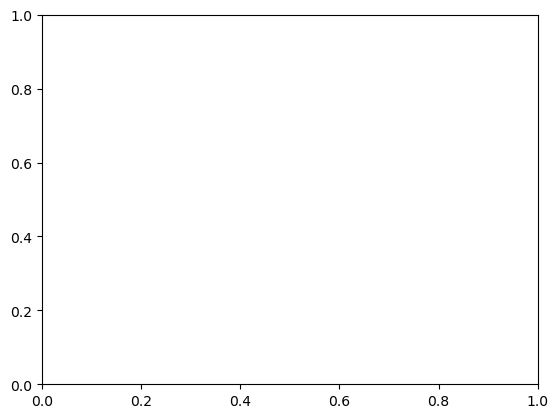

In [324]:
plt.plot(merged_df['date'], merged_df['cc_bals_30d_due_percentage_6m'])

In [325]:
#Adding mortgage costs and credit card service costs

features = ['cpi_yoy', 'shelter_yoy', 'energy_yoy',
       'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'new_&_used_vehicles_yoy', 'total_personal_savings', 'total_employee_compensation',
           'population', 'wages_and_salaries_all', 'employer_contributions_for_government_social_insurance' , 'social_security', 'personal_interest_income', 'mortgage_rate_30_yr',
       'tax_other_to_government', 'Mortgage_servicing_yoy', 'cc_payments_yoy']
X = merged_df[108:241][features]
y = merged_df[108:241]['cc_bals_30d_due_percentage_6m']

In [326]:
merged_df[108:241]

,Unnamed: 0,date,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,...,cc_bals_30d_due_percentage_yoy_6m,cc_bals_30d_due_percentage_6m,Qtr_y,Mortgage_y,HE Revolving_y,Auto Loan_y,Credit Card_y,Student Loan_y,Other_y,Total_y
108,108,2012-01,2012,January,313636000.0,8.3,1.706037,2.925217,1.959370,6.125429,...,0.000000,3.150000,12:Q1,8.187,0.6118,0.7365,0.6788,0.903656,0.3185,11.436256
109,109,2012-02,2012,February,313811000.0,8.3,1.792742,2.871099,2.011411,6.965970,...,0.000000,3.130000,12:Q2,8.147,0.5890,0.7500,0.6720,0.914000,0.3120,11.384000
110,110,2012-03,2012,March,313993000.0,8.2,2.142545,2.651398,2.125057,4.570008,...,0.000000,3.110000,12:Q2,8.147,0.5890,0.7500,0.6720,0.914000,0.3120,11.384000
111,111,2012-04,2012,April,314176000.0,8.2,2.095155,2.302740,2.253886,0.884041,...,0.000000,3.090000,12:Q2,8.147,0.5890,0.7500,0.6720,0.914000,0.3120,11.384000
112,112,2012-05,2012,May,314368000.0,8.2,1.827676,1.704254,2.310301,-3.867484,...,0.000000,3.043333,12:Q3,8.028,0.5730,0.7680,0.6740,0.956000,0.3110,11.310000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,236,2022-09,2022,September,333925000.0,3.5,5.137318,8.201670,6.606322,19.786245,...,51.559633,2.753333,22:Q4,11.923,0.3360,1.5520,0.9860,1.595000,0.5070,16.899000
237,237,2022-10,2022,October,334071000.0,3.6,4.975923,7.745427,6.903758,17.631923,...,53.333333,2.760000,22:Q4,11.923,0.3360,1.5520,0.9860,1.595000,0.5070,16.899000
238,238,2022-11,2022,November,334206000.0,3.6,5.089629,7.110323,7.086614,13.065612,...,51.742160,2.903333,23:Q1,12.044,0.3390,1.5620,0.9860,1.604000,0.5120,17.047000
239,239,2022-12,2022,December,334326000.0,3.5,4.904459,6.454401,7.475966,7.310495,...,50.328947,3.046667,23:Q1,12.044,0.3390,1.5620,0.9860,1.604000,0.5120,17.047000


In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [328]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [329]:
pipe1= Pipeline([
    ('lasso', Lasso())
])

pipe1_params = {
               'lasso__alpha': [0.01, 0.1, 1, 10, 100]
                }

gs_lr = GridSearchCV(pipe1,
                  param_grid=pipe1_params,
                  cv=5,
                  verbose=1)

gs_lr.fit(X_train, y_train)

gs_lr_model = gs_lr.best_estimator_

cross_val_score(gs_lr_model, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


0.8053654531271228

In [330]:
pipe2= Pipeline([
    ('ridge', Ridge())
])

pipe2_params = {
               'ridge__alpha': [0.01, 0.1, 1, 10, 100]
                }

gs_lr2 = GridSearchCV(pipe2,
                  param_grid=pipe2_params,
                  cv=5,
                  verbose=1)

gs_lr2.fit(X_train, y_train)

gs_lr2_model = gs_lr2.best_estimator_

cross_val_score(gs_lr2_model, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


0.8743881898801742

In [331]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9465291194816262

In [214]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.8948967735600204

In [ ]:
#Now split into bull/bear markets

In [332]:
#merged_df.to_csv('data/Master_data.csv')

In [333]:
Time series

SyntaxError: invalid syntax (1776034357.py, line 1)

In [334]:
merged_df.shape


(247, 77)

In [336]:
df = pd.read_csv('data/master_with_gdp.csv')

In [337]:
df.shape

(276, 50)

In [338]:
 #Doing PCA

In [339]:
from sklearn.decomposition import PCA

In [340]:
pca = PCA()

In [341]:
pca.fit(X_train)

PCA()

In [342]:
Z_train = pca.transform(X_train)

In [343]:
pd.DataFrame(Z_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,4.934325e-17,-2.242875e-17,5.382900e-17,-1.121437e-17,2.859665e-17,-1.233581e-17,-9.251859e-18,1.401797e-17,5.158612e-17,3.266186e-17,9.251859e-18,3.861950e-17,8.130421e-18,4.366597e-17,3.083953e-18,-1.226572e-17,-1.436842e-18,-5.042088e-17
std,3.229447e+00,1.742605e+00,1.504545e+00,1.024999e+00,7.284814e-01,6.845334e-01,3.749233e-01,3.504046e-01,2.715249e-01,1.467076e-01,1.344133e-01,1.053096e-01,7.558181e-02,7.188390e-02,6.148288e-02,3.877936e-02,1.369199e-02,3.955878e-03
min,-4.210224e+00,-4.589945e+00,-2.747400e+00,-1.663583e+00,-1.729081e+00,-1.372067e+00,-7.946048e-01,-8.539096e-01,-7.618373e-01,-2.595822e-01,-3.566664e-01,-2.554622e-01,-1.685708e-01,-1.707827e-01,-1.488237e-01,-8.800320e-02,-3.605361e-02,-7.148720e-03
25%,-2.426700e+00,-5.845083e-01,-1.237846e+00,-6.894590e-01,-3.819165e-01,-4.047132e-01,-2.712563e-01,-2.088404e-01,-1.673600e-01,-1.048293e-01,-8.863576e-02,-6.846974e-02,-5.159637e-02,-4.464247e-02,-3.617801e-02,-2.192682e-02,-9.157140e-03,-2.769449e-03
50%,-2.766383e-01,4.410834e-01,-5.837189e-02,-7.072973e-02,-5.448264e-02,1.292502e-02,3.040083e-02,-1.418543e-03,3.232456e-03,-1.088039e-02,-2.651296e-03,1.818179e-02,-4.778584e-03,-4.543020e-03,1.857072e-04,1.185266e-04,1.619100e-03,-5.279254e-04
75%,9.215359e-01,7.341213e-01,1.112663e+00,6.502991e-01,5.447705e-01,3.750464e-01,2.431799e-01,1.955377e-01,1.852214e-01,8.337154e-02,6.784575e-02,6.483484e-02,3.914360e-02,5.458766e-02,4.158929e-02,2.710812e-02,7.957544e-03,3.109934e-03
max,8.218982e+00,4.752341e+00,4.618243e+00,2.415365e+00,2.208666e+00,2.869800e+00,1.141357e+00,1.291072e+00,8.866514e-01,5.344404e-01,3.592548e-01,2.825215e-01,1.899617e-01,3.071213e-01,1.636653e-01,9.903589e-02,3.617769e-02,1.076500e-02


In [344]:
Z_test = pca.transform(X_test)

In [347]:
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 30 components): {np.round(var_exp[:30], 3)}')

Explained variance (first 30 components): [0.574 0.167 0.124 0.058 0.029 0.026 0.008 0.007 0.004 0.001 0.001 0.001
 0.    0.    0.    0.    0.    0.   ]


In [ ]:
#Using LR and RF on PC1-3

In [348]:
df_pca = pd.DataFrame(Z_train)

In [384]:
df_pca.to_csv('data/pca.csv')

In [351]:
df_pca.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.000000e+00,-2.254629e-16,2.194019e-16,4.449137e-17,-1.995405e-16,3.421963e-16,-7.514443e-16,-1.080271e-15,7.226857e-17,6.789319e-16,4.263009e-16,-2.277538e-15,2.142064e-15,3.115303e-15,-2.612098e-16,-4.182350e-15,3.951578e-15,2.798708e-14
1,-2.254629e-16,1.000000e+00,-1.040486e-15,3.450328e-16,2.733020e-16,-8.547380e-18,1.257999e-15,-3.515803e-16,6.680050e-16,-5.672082e-16,5.417025e-16,-1.927613e-15,2.431770e-15,4.431488e-16,9.912934e-16,-4.023423e-16,-1.448166e-15,7.149029e-14
2,2.194019e-16,-1.040486e-15,1.000000e+00,-4.113801e-17,4.454898e-16,-2.221957e-16,5.442593e-16,-2.600126e-16,5.185742e-16,1.471736e-15,-5.027720e-16,-1.605194e-15,-1.622929e-15,1.516233e-15,-6.552070e-16,3.948897e-15,3.657076e-15,-4.734772e-15
3,4.449137e-17,3.450328e-16,-4.113801e-17,1.000000e+00,4.756414e-16,-1.097930e-16,-1.945638e-16,-3.564258e-16,4.477582e-17,-4.868649e-16,1.942630e-16,7.910793e-16,-4.725130e-16,1.060909e-15,-2.539188e-16,2.661279e-15,3.410520e-15,3.531719e-15
4,-1.995405e-16,2.733020e-16,4.454898e-16,4.756414e-16,1.000000e+00,2.271805e-18,4.258678e-16,-2.385472e-16,4.461987e-16,-9.504549e-16,3.111174e-16,3.455869e-16,-7.540967e-16,5.661987e-17,3.260510e-17,-5.059733e-17,-1.177853e-14,3.082558e-15
5,3.421963e-16,-8.547380e-18,-2.221957e-16,-1.097930e-16,2.271805e-18,1.000000e+00,-2.093963e-16,3.748896e-16,-1.763766e-16,-6.181484e-16,6.290932e-17,-4.972408e-16,-1.093792e-15,1.266973e-15,5.030215e-16,2.035803e-15,-6.239977e-15,5.441904e-16
6,-7.514443e-16,1.257999e-15,5.442593e-16,-1.945638e-16,4.258678e-16,-2.093963e-16,1.000000e+00,-6.386609e-17,9.212216e-16,-3.829624e-17,-9.715646e-16,6.839214e-16,-8.535995e-16,-1.267615e-16,7.195272e-16,-2.320513e-15,-7.637811e-16,-6.683545e-16
7,-1.080271e-15,-3.515803e-16,-2.600126e-16,-3.564258e-16,-2.385472e-16,3.748896e-16,-6.386609e-17,1.000000e+00,-1.021031e-15,3.749813e-16,1.142901e-15,-6.811690e-16,8.266903e-16,1.149001e-15,-3.919210e-16,-1.507187e-15,-6.740720e-15,2.952108e-14
8,7.226857e-17,6.680050e-16,5.185742e-16,4.477582e-17,4.461987e-16,-1.763766e-16,9.212216e-16,-1.021031e-15,1.000000e+00,4.710292e-16,1.581138e-16,-2.550492e-16,6.364438e-16,1.422031e-15,9.670194e-16,-1.107846e-15,4.337568e-15,-3.699712e-15
9,6.789319e-16,-5.672082e-16,1.471736e-15,-4.868649e-16,-9.504549e-16,-6.181484e-16,-3.829624e-17,3.749813e-16,4.710292e-16,1.000000e+00,3.850938e-16,-4.935249e-16,7.574788e-16,5.366986e-16,-2.953479e-16,-1.484121e-15,4.956870e-16,5.351429e-15


In [378]:
df_pca_PC1_5 = df_pca[[0,1,2,3,4]]
df_pca_PC1_5

,0,1,2,3,4
0,0.766492,0.079221,1.272975,-1.564880,0.556608
1,-2.840993,1.243197,-1.499922,-0.036183,0.905809
2,7.965642,3.720966,0.557430,2.308672,-0.195675
3,3.563814,-3.350308,-2.241053,-0.838176,0.442367
4,-1.906858,0.727772,1.367484,0.435175,-1.476534
...,...,...,...,...,...
94,-0.004162,0.009220,-0.279491,-1.433680,-0.151923
95,0.067975,-3.032120,1.773057,0.325833,0.645813
96,-3.869588,0.535989,-1.239815,0.705821,-0.054483
97,0.647976,-0.585397,1.771219,-0.644510,-0.833616


In [379]:
lr_pca5 = LinearRegression()
lr_pca5.fit(df_pca_PC1_5, y_train)

LinearRegression()

In [380]:
lr_pca5.coef_

array([-0.00319791,  0.1453899 ,  0.01004391, -0.04506659, -0.13913281])

In [381]:
cross_val_score(lr_pca5, df_pca_PC1_5, y_train, cv=5).mean()

0.3988838913400802

In [382]:
from sklearn.ensemble import RandomForestRegressor
rf_pca_1_3 = RandomForestRegressor()
rf_pca_1_3.fit(df_pca_PC1_5, y_train)


RandomForestRegressor()

In [383]:
cross_val_score(rf, df_pca_PC1_5, y_train, cv=5).mean()

0.8319856249709698